In [2]:
from common import *
from sklearn import linear_model
import _pickle as pickle
import sklearn.metrics as sm

In [3]:
filename = f"{DATA_DIR}/data_singlevar.txt"

In [4]:
X, y = [], []

In [8]:
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

In [16]:
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

In [17]:
# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

In [18]:
# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

In [20]:
# Create linear regression object
linear_regressor = linear_model.LinearRegression()

In [21]:
# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Predict the output
y_test_pred = linear_regressor.predict(X_test)

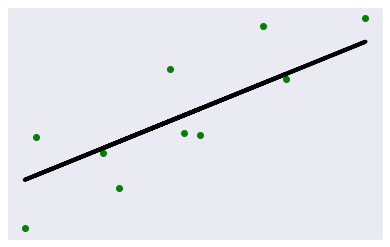

In [23]:
# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [24]:
# Measure performance
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explain variance score = 0.68
R2 score = 0.68


In [27]:
# Model persistence
output_model_file = '3_model_linear_regr.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)
with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)
y_test_pred_new = model_linregr.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2)) 


New mean absolute error = 0.54
